# Food Habits and Health

In [295]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

## Data Preprocessing

### Read Dataset

In [296]:
df = pd.read_csv("ehresp_2014.csv")
df.head()

,tucaseid,tulineno,eeincome1,erbmi,erhhch,erincome,erspemch,ertpreat,ertseat,ethgt,...,eumeat,eumilk,euprpmel,eusoda,eustores,eustreason,eutherm,euwgt,euwic,exincome1
0,20140101140007,1,-2,33.200001,1,-1,-1,30,2,0,...,1,2,1,-1,2,1,2,170,1,2
1,20140101140011,1,1,22.700001,3,1,-1,45,14,0,...,1,2,1,-1,1,2,2,128,2,0
2,20140101140028,1,2,49.400002,3,5,-1,60,0,0,...,-1,-1,2,2,-1,-1,-1,270,2,12
3,20140101140063,1,-2,-1.000000,3,-1,-1,0,0,0,...,2,2,1,1,2,6,-1,-2,2,2
4,20140101140168,1,2,31.000000,3,5,-1,65,0,0,...,1,2,1,2,1,1,2,210,1,0


### Remove Unnecessary Columns

In [297]:
df_new = df[['erbmi','ertpreat','eudrink','eueat','euexercise','eufastfd','eufdsit','euprpmel','eusoda','eugenhth']]
df_new.to_csv('revised_dataset.csv',index=False)
df_new.head()

,erbmi,ertpreat,eudrink,eueat,euexercise,eufastfd,eufdsit,euprpmel,eusoda,eugenhth
0,33.200001,30,2,1,2,2,1,1,-1,1
1,22.700001,45,2,1,2,1,1,1,-1,2
2,49.400002,60,1,2,2,2,1,2,2,5
3,-1.000000,0,1,2,2,2,1,1,1,2
4,31.000000,65,1,2,1,2,1,1,2,4


### Drop records which have NaN values

In [298]:
df_revised = pd.read_csv("revised_dataset.csv", na_values=['-1','-2','-3'])
df_revised = df_revised.dropna()
df_revised.head()

,erbmi,ertpreat,eudrink,eueat,euexercise,eufastfd,eufdsit,euprpmel,eusoda,eugenhth
2,49.400002,60,1.0,2.0,2.0,2.0,1.0,2.0,2.0,5.0
4,31.000000,65,1.0,2.0,1.0,2.0,1.0,1.0,2.0,4.0
5,30.700001,20,1.0,1.0,1.0,1.0,1.0,2.0,1.0,3.0
6,33.299999,30,1.0,1.0,2.0,1.0,1.0,3.0,2.0,2.0
9,28.299999,80,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0


## Codify BMI

In [299]:
def codify_bmi(x):
    if(x < 18.5):
        return 1
    elif(x < 25):
        return 2
    else:
        return 3

In [300]:
df_revised['codified_bmi'] = df_revised['erbmi'].apply(codify_bmi)

## Codify General Health

In [301]:
# Excellent,Very Good,Good health to 1
# Fair,Poor health to 0
def codify_gen_health(x):
    if(x==1):
        return 1
    elif(x==2):
        return 1
    elif(x==3):
        return 1
    elif(x==4):
        return 2
    elif(x==5):
        return 2
    else:
        return 2

In [302]:
df_revised['codified_health'] = df_revised['eugenhth'].apply(codify_gen_health)
#df_revised.groupby('eugenhth').count()

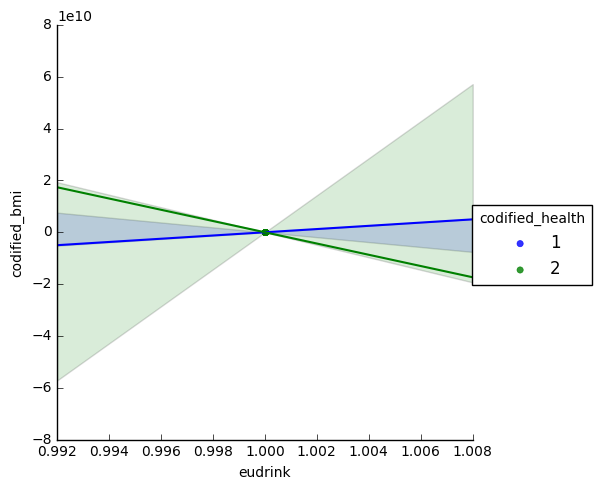

In [303]:
#sb.pairplot(df_revised[['eudietsoda','eumilk','codified_health']], hue='codified_health')
sb.lmplot(x='eudrink', y='codified_bmi', data=df_revised,hue='codified_health')
plt.show()

## Training and Test Data Split

In [304]:
shape_of_data = df_revised.shape
X = df_revised.iloc[:, 0:(shape_of_data[1]-3)] 
#X = df_revised[['euexfreq','eufastfd','eufastfdfrq','eufdsit','euffyday','eumeat','eumilk','euprpmel','eusoda']]

y = df_revised['codified_health']
X.head()

,erbmi,ertpreat,eudrink,eueat,euexercise,eufastfd,eufdsit,euprpmel,eusoda
2,49.400002,60,1.0,2.0,2.0,2.0,1.0,2.0,2.0
4,31.000000,65,1.0,2.0,1.0,2.0,1.0,1.0,2.0
5,30.700001,20,1.0,1.0,1.0,1.0,1.0,2.0,1.0
6,33.299999,30,1.0,1.0,2.0,1.0,1.0,3.0,2.0
9,28.299999,80,1.0,2.0,2.0,1.0,1.0,1.0,1.0


In [305]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Training Data Size: ' , X_train.shape)
print('Testing Data Size: ' , X_test.shape)
print('Features Training Size: ' , y_train.shape)
print('Features Test Size: ' , y_test.shape)

Training Data Size:  (5672, 9)
Testing Data Size:  (1418, 9)
Features Training Size:  (5672,)
Features Test Size:  (1418,)


## SVM

In [306]:
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=0)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.846967559944


## Logistic Regression Classifier


In [307]:
model = LogisticRegression()
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test, y_test)
#model.predict_proba(X_test)

0.844851904090268

In [308]:
target_names = ['1', '2']
print(classification_report(y_test, y_pred, target_names=target_names))

             precision    recall  f1-score   support

          1       0.85      0.99      0.91      1199
          2       0.48      0.07      0.12       219

avg / total       0.80      0.84      0.79      1418



## Random Forest Classifier

In [309]:
clf = RandomForestClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(clf.score(X_test,y_test))

0.845557122708


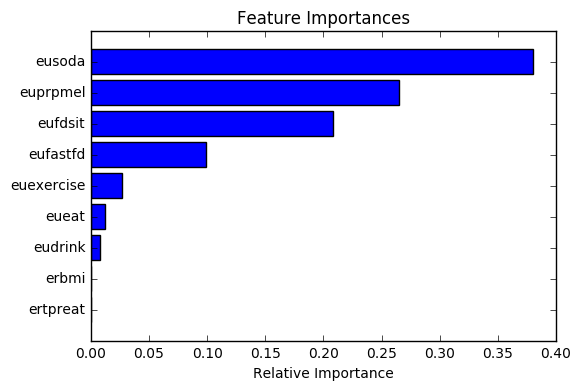

In [310]:
features = df[['ertpreat','erbmi','eudrink','eueat','euexercise','eufastfd','eufdsit','euprpmel','eusoda',]]
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features) ## removed [indices]
plt.xlabel('Relative Importance')
plt.show()

# Classfication for BMI

## Train and test split

In [311]:
shape_of_data = df_revised.shape
X = df_revised.iloc[:, 1:(shape_of_data[1]-3)] 
#X = df_revised[['euexfreq','eufastfd','eufastfdfrq','eufdsit','euffyday','eumeat','eumilk','euprpmel','eusoda']]
y = df_revised['codified_bmi']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X.head()

,ertpreat,eudrink,eueat,euexercise,eufastfd,eufdsit,euprpmel,eusoda
2,60,1.0,2.0,2.0,2.0,1.0,2.0,2.0
4,65,1.0,2.0,1.0,2.0,1.0,1.0,2.0
5,20,1.0,1.0,1.0,1.0,1.0,2.0,1.0
6,30,1.0,1.0,2.0,1.0,1.0,3.0,2.0
9,80,1.0,2.0,2.0,1.0,1.0,1.0,1.0


In [312]:
clf = RandomForestClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(clf.score(X_test,y_test))

0.621297602257


In [313]:
from sklearn.multiclass import OneVsRestClassifier
clf = OneVsRestClassifier(clf).fit(X_train, y_train)
clf.score(X_test,y_test)

0.62129760225669961

# Linear Regression for BMI

## Train and test split

In [314]:
shape_of_data = df_revised.shape
X = df_revised.iloc[:, 1:(shape_of_data[1]-2)] 
#X = df_revised[['euexfreq','eufastfd','eufastfdfrq','eufdsit','euffyday','eumeat','eumilk','euprpmel','eusoda']]
y = df_revised['erbmi']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X.head()

,ertpreat,eudrink,eueat,euexercise,eufastfd,eufdsit,euprpmel,eusoda,eugenhth
2,60,1.0,2.0,2.0,2.0,1.0,2.0,2.0,5.0
4,65,1.0,2.0,1.0,2.0,1.0,1.0,2.0,4.0
5,20,1.0,1.0,1.0,1.0,1.0,2.0,1.0,3.0
6,30,1.0,1.0,2.0,1.0,1.0,3.0,2.0,2.0
9,80,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0


Mean squared error: 35.25


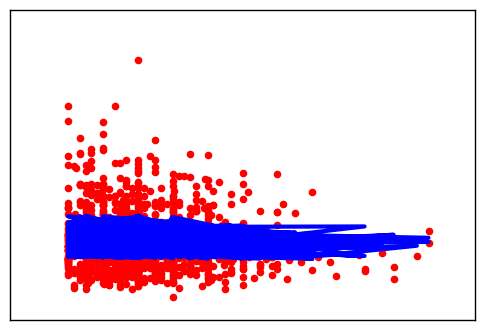

In [315]:
regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print("Mean squared error: %.2f"
 % mean_squared_error(y_test, y_pred))

plt.scatter(X_test.iloc[:,0], y_test,  color='red')   #Red represents actual
plt.plot(X_test.iloc[:,0], y_pred, color='blue', linewidth=3) # Predicted

plt.xticks(())
plt.yticks(())

plt.show()

Mean squared error: 35.41


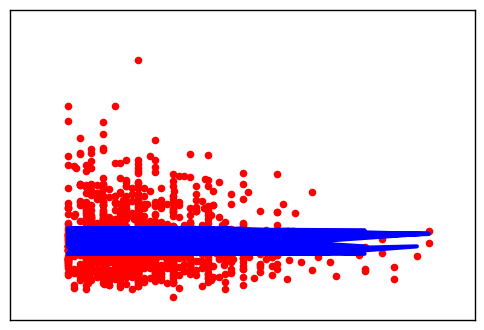

In [316]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print("Mean squared error: %.2f"
 % mean_squared_error(y_test, y_pred))
plt.scatter(X_test.iloc[:,0], y_test,  color='red')   #Red represents actual
plt.plot(X_test.iloc[:,0], y_pred, color='blue', linewidth=3) # Predicted

plt.xticks(())
plt.yticks(())

plt.show()

Mean squared error: 37.88


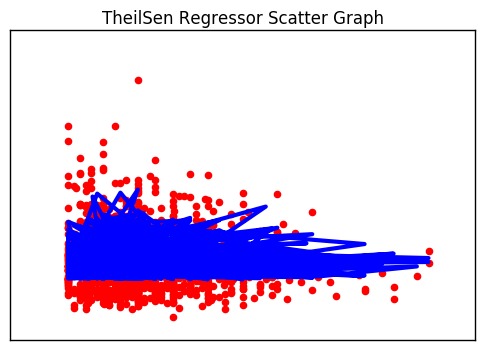

In [317]:
from sklearn.linear_model import LinearRegression, TheilSenRegressor
from sklearn.linear_model import RANSACRegressor


regr = TheilSenRegressor(random_state=42)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print("Mean squared error: %.2f"
 % mean_squared_error(y_test, y_pred))
plt.scatter(X_test.iloc[:,0], y_test,  color='red')   #Red represents actual
plt.plot(X_test.iloc[:,0], y_pred, color='blue', linewidth=3) # Predicted

plt.xticks(())
plt.yticks(())
plt.title('TheilSen Regressor Scatter Graph')

plt.show()

Mean squared error: 45.39


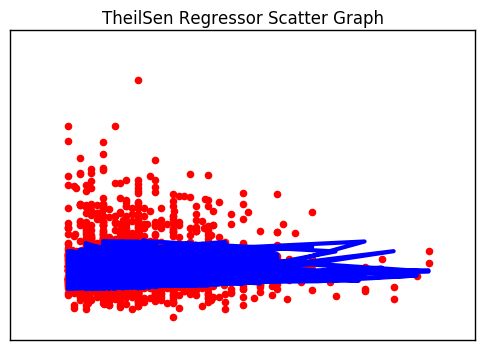

In [318]:
regr = RANSACRegressor(random_state=42)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print("Mean squared error: %.2f"
 % mean_squared_error(y_test, y_pred))
plt.scatter(X_test.iloc[:,0], y_test,  color='red')   #Red represents actual
plt.plot(X_test.iloc[:,0], y_pred, color='blue', linewidth=3) # Predicted

plt.xticks(())
plt.yticks(())
plt.title('TheilSen Regressor Scatter Graph')

plt.show()

Mean squared error: 43.09


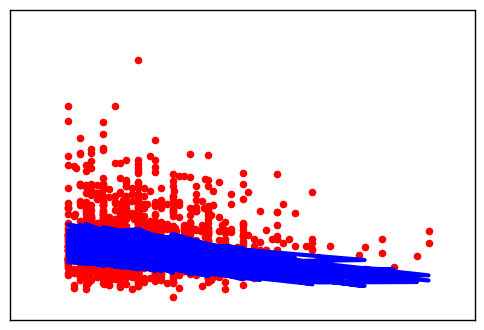

In [319]:
from sklearn.svm import LinearSVR
regr = LinearSVR(random_state=0)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print("Mean squared error: %.2f"
 % mean_squared_error(y_test, y_pred))
plt.scatter(X_test.iloc[:,0], y_test,  color='red')   #Red represents actual
plt.plot(X_test.iloc[:,0], y_pred, color='blue', linewidth=3) # Predicted

plt.xticks(())
plt.yticks(())

plt.show()